In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', None)

import spacy
import re
import nltk

import matplotlib.colors as mcolors
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import string

from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split

from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#df = pd.read_csv(r"C:\Users\lily\Desktop\IT alapok privát\PRIV DATA SC NLP\subjects-questions.csv")

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/subjects-questions.csv')

In [4]:
df

,eng,Subject
0,An anti-forest measure is\nA. Afforestation\nB. Selective grazing\nC . Clearing forest\nD. Selective felling,Biology
1,"Among the following organic acids, the acid present in rancid butter is:\nA . pyruvic acid\nB. lactic acid\nc. butyric acid\nD. acetic acid",Chemistry
2,"If the area of two similar triangles are equal, then they are\nA . equilateral\nB. isosceles\nc. congruent\nD. not congruent",Maths
3,"In recent year, there has been a growing\nconcern about the gradually increasing average global temperatures. If this trend continues, would you expert the distributional range of some species to be affected?",Biology
4,"Which of the following statement\nregarding transformer is incorrect?\nA. A transformer makes use of Faradays Law.\nB. The ferromagnetic properties of an iron core is used by it to efficiently raise or lower AC voltage\nC. It cannot increase power so that if the voltage is raised, the current is proportionally lowered and vice versa.\nD. The current induced in primary circuit is of same nature as in secondary circuit with differences in amplitude only.",Physics
...,...,...
122514,"Which of the following group of\ncharacters is present in all chordates in\nsome or other stage in their life\nA. Mammary glands, hair and gill slits\nB. Notochord, gill slits and dorsal tubular nervous system\nC. Notochord, scales and dorsal tubular nervous system\nD. Gill slits vertebral column and notochord",Biology
122515,Light year is the\nA. light emitted by the sun in one year.\nB. the time taken by light to travel from sun to earth.\nC. the distance travelled by light in free space in one year.\nD. the time taken by earth to go once around the sun.,Physics
122516,Member of Dipnoi are native of\nA. India.\nB. Africa and Australia.\nc. New Zealand\nD. None of the above,Biology
122517,"In one average-life,\nA. half the active nuclei decay\nB. less than half the active nuclei decay.\nC. more than half the active nuclei decay.\nD. all the nuclei decay.",Physics


Due to capacity limitation, will cut and use onyl 10 000 rows, instead of 122 519.

In [5]:
df = df.loc[:10000]

In [6]:
df['Subject'].value_counts().sort_values(ascending=True)

,count
Subject,
Biology,1116
Maths,2682
Chemistry,3081
Physics,3122


Note: Imbalanced dataset

In [7]:
df['Subject'].value_counts(normalize=True)

,proportion
Subject,
Physics,0.312169
Chemistry,0.308069
Maths,0.268173
Biology,0.111589


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   eng      10001 non-null  object
 1   Subject  10001 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [9]:
base_colors = ['#1f77b4', '#d62728', '#9467bd', '#8c564b']
pastel_colors = [mcolors.to_rgba(c, alpha=0.6) for c in base_colors]

In [10]:
label_counts = df['Subject'].value_counts().sort_index()

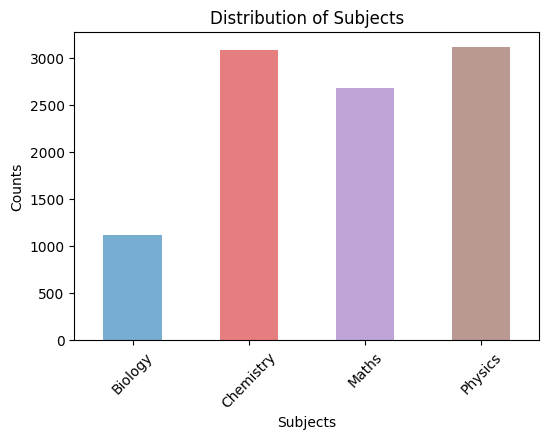

In [11]:
plt.figure(figsize=(6,4))
label_counts.plot(kind='bar', color=pastel_colors)
plt.xlabel('Subjects')
plt.ylabel('Counts')
plt.title('Distribution of Subjects')
plt.xticks(rotation=46)
plt.show()

Text(0.5, 1.0, 'Histogram of Text Lengths')

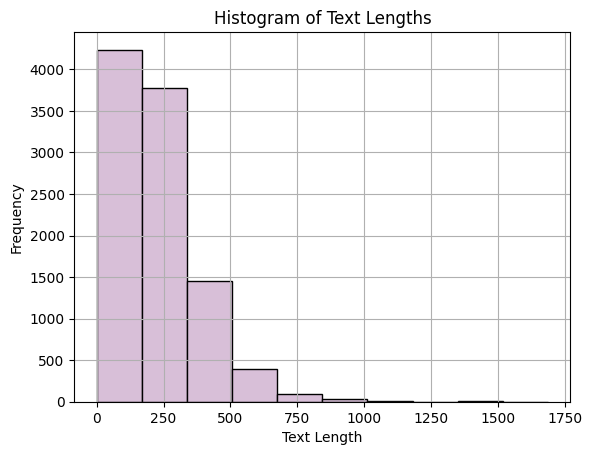

In [12]:
df['eng'].str.len().hist(color='#D8BFD8', edgecolor='black')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Histogram of Text Lengths')

More than 250 of the descriptions in the 'eng' feature consist of min 3800 string.

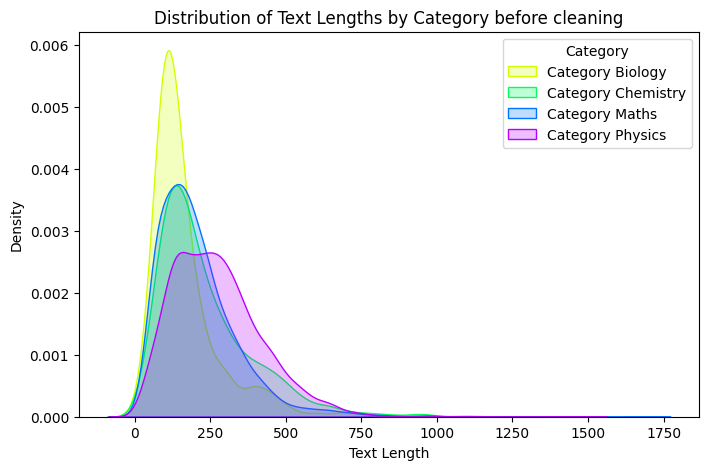

In [20]:
# df['text_length'] = df['eng'].str.len()
# #showing the no of characters in each string within the df['eng'] column, including spaces, punctuation, and special characters.

# plt.figure(figsize=(8,5))
# palette = sns.color_palette("hsv", n_colors=df['Subject'].nunique())

# subject_to_index = {subject: idx for idx, subject in enumerate(df['Subject'].unique())}

# for label in df['Subject'].unique():
#     subset = df[df['Subject'] == label]
#     sns.kdeplot(subset['text_length'], shade=True, color=palette[subject_to_index[label]], label=f'Category {label}')

# plt.xlabel('Text Length')
# plt.ylabel('Density')
# plt.title('Distribution of Text Lengths by Category before cleaning')
# plt.legend(title='Category')
# plt.show()

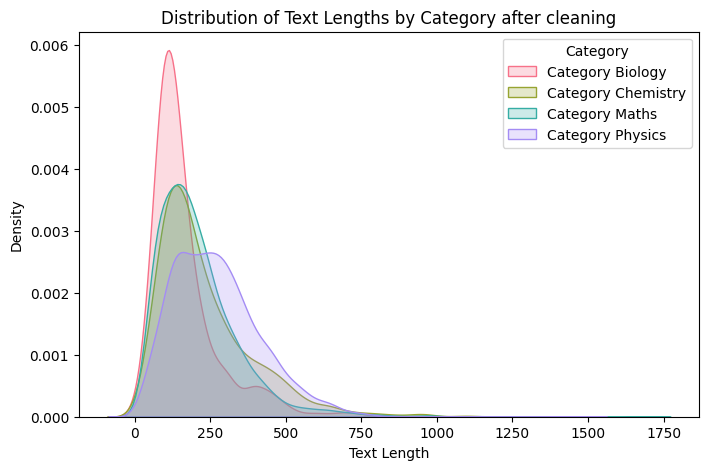

In [21]:
df['word_count'] = df['eng'].str.split().str.len()

plt.figure(figsize=(8,5))
palette = sns.color_palette("husl", n_colors=df['Subject'].nunique())

# Dictionary comprehension to map each subject to a corresponding index
subject_to_index = {subject: idx for idx, subject in enumerate(df['Subject'].unique())}

for label in df['Subject'].unique():
    subset = df[df['Subject'] == label]
    sns.kdeplot(subset['text_length'], shade=True, color=palette[subject_to_index[label]], label=f'Category {label}')

plt.xlabel('Text Length')
plt.ylabel('Density')
plt.title('Distribution of Text Lengths by Category after cleaning')
plt.legend(title='Category')
plt.show()

In [22]:
df.head()

,eng,Subject,text_length,cleaned_text,word_count
0,An anti-forest measure is\nA. Afforestation\nB. Selective grazing\nC . Clearing forest\nD. Selective felling,Biology,104,anti forest measure afforestation selective grazing c clear forest selective felling,16
1,"Among the following organic acids, the acid present in rancid butter is:\nA . pyruvic acid\nB. lactic acid\nc. butyric acid\nD. acetic acid",Chemistry,135,follow organic acid acid present rancid butter pyruvic acid lactic acid butyric acid acetic acid,25
2,"If the area of two similar triangles are equal, then they are\nA . equilateral\nB. isosceles\nc. congruent\nD. not congruent",Maths,120,area similar triangle equal equilateral isosceles congruent congruent,22
3,"In recent year, there has been a growing\nconcern about the gradually increasing average global temperatures. If this trend continues, would you expert the distributional range of some species to be affected?",Biology,207,recent year grow concern gradually increase average global temperature trend continue expert distributional range specie affect,32
4,"Which of the following statement\nregarding transformer is incorrect?\nA. A transformer makes use of Faradays Law.\nB. The ferromagnetic properties of an iron core is used by it to efficiently raise or lower AC voltage\nC. It cannot increase power so that if the voltage is raised, the current is proportionally lowered and vice versa.\nD. The current induced in primary circuit is of same nature as in secondary circuit with differences in amplitude only.",Physics,451,follow statement transformer incorrect transformer make use faradays law ferromagnetic property iron core efficiently raise low ac voltage increase power voltage raise current proportionally lower vice versa current induce primary circuit nature secondary circuit difference amplitude,76


In [14]:
nlp = spacy.load('en_core_web_sm')

In [23]:
def preprocess_text_spacy(text):
    text = text.replace('\n', ' ')
    doc = nlp(text)
    text = re.sub(r'\s+', ' ', text)

    tokens = []
    for token in doc:
        if token.is_alpha and not token.is_stop:
            tokens.append(token.lemma_.lower())
    return ' '.join(tokens)

In [17]:
df['cleaned_text'] = df['eng'].apply(preprocess_text_spacy)

In [19]:
df.head()

,eng,Subject,text_length,cleaned_text
0,An anti-forest measure is\nA. Afforestation\nB. Selective grazing\nC . Clearing forest\nD. Selective felling,Biology,104,anti forest measure afforestation selective grazing c clear forest selective felling
1,"Among the following organic acids, the acid present in rancid butter is:\nA . pyruvic acid\nB. lactic acid\nc. butyric acid\nD. acetic acid",Chemistry,135,follow organic acid acid present rancid butter pyruvic acid lactic acid butyric acid acetic acid
2,"If the area of two similar triangles are equal, then they are\nA . equilateral\nB. isosceles\nc. congruent\nD. not congruent",Maths,120,area similar triangle equal equilateral isosceles congruent congruent
3,"In recent year, there has been a growing\nconcern about the gradually increasing average global temperatures. If this trend continues, would you expert the distributional range of some species to be affected?",Biology,207,recent year grow concern gradually increase average global temperature trend continue expert distributional range specie affect
4,"Which of the following statement\nregarding transformer is incorrect?\nA. A transformer makes use of Faradays Law.\nB. The ferromagnetic properties of an iron core is used by it to efficiently raise or lower AC voltage\nC. It cannot increase power so that if the voltage is raised, the current is proportionally lowered and vice versa.\nD. The current induced in primary circuit is of same nature as in secondary circuit with differences in amplitude only.",Physics,451,follow statement transformer incorrect transformer make use faradays law ferromagnetic property iron core efficiently raise low ac voltage increase power voltage raise current proportionally lower vice versa current induce primary circuit nature secondary circuit difference amplitude


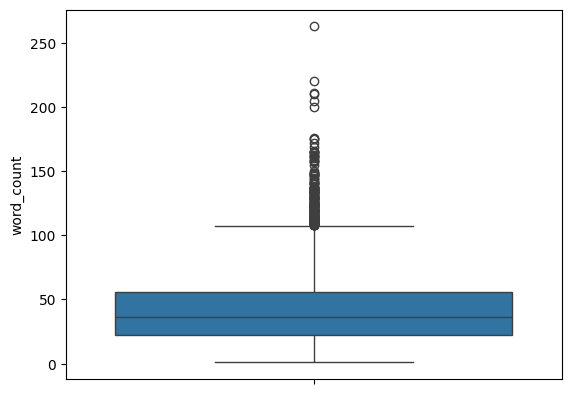

In [24]:
sns.boxplot(data=df, y='word_count')
plt.show()

In [25]:
non_outlier_condition = (
    (df['text_length'] < df['text_length'].quantile(0.97)) &
    (df['text_length'] > df['text_length'].quantile(0.02))
)

In [27]:
df_cleaned = df[non_outlier_condition]
df_cleaned.head()

,eng,Subject,text_length,cleaned_text,word_count
0,An anti-forest measure is\nA. Afforestation\nB. Selective grazing\nC . Clearing forest\nD. Selective felling,Biology,104,anti forest measure afforestation selective grazing c clear forest selective felling,16
1,"Among the following organic acids, the acid present in rancid butter is:\nA . pyruvic acid\nB. lactic acid\nc. butyric acid\nD. acetic acid",Chemistry,135,follow organic acid acid present rancid butter pyruvic acid lactic acid butyric acid acetic acid,25
2,"If the area of two similar triangles are equal, then they are\nA . equilateral\nB. isosceles\nc. congruent\nD. not congruent",Maths,120,area similar triangle equal equilateral isosceles congruent congruent,22
3,"In recent year, there has been a growing\nconcern about the gradually increasing average global temperatures. If this trend continues, would you expert the distributional range of some species to be affected?",Biology,207,recent year grow concern gradually increase average global temperature trend continue expert distributional range specie affect,32
4,"Which of the following statement\nregarding transformer is incorrect?\nA. A transformer makes use of Faradays Law.\nB. The ferromagnetic properties of an iron core is used by it to efficiently raise or lower AC voltage\nC. It cannot increase power so that if the voltage is raised, the current is proportionally lowered and vice versa.\nD. The current induced in primary circuit is of same nature as in secondary circuit with differences in amplitude only.",Physics,451,follow statement transformer incorrect transformer make use faradays law ferromagnetic property iron core efficiently raise low ac voltage increase power voltage raise current proportionally lower vice versa current induce primary circuit nature secondary circuit difference amplitude,76


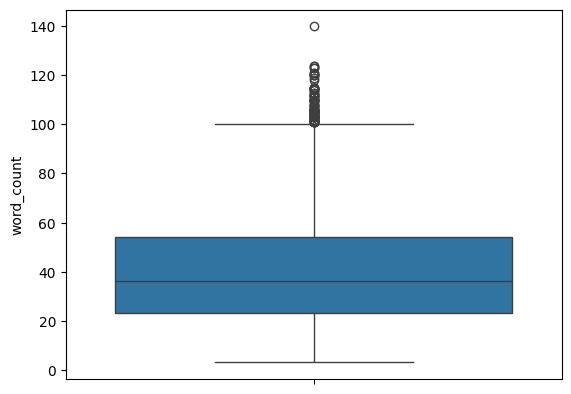

In [28]:
sns.boxplot(data=df_cleaned, y='word_count')
plt.show()

In [35]:
doc = df_cleaned['cleaned_text']

In [36]:
print(type(doc))

<class 'pandas.core.series.Series'>


In [38]:
doc_list = doc.tolist()

In [39]:
# IDF computation & Top 10,000 terms based on TF-IDF scores & ngram
tfidf = TfidfVectorizer(use_idf=True, max_features = 10000, ngram_range=(1,3))
tfidf_vec= tfidf.fit_transform(doc_list)
doc = tfidf_vec.toarray()

In [40]:
doc

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
# subject_questions_X = pd.DataFrame(doc)
# csv_file_path_X = "C:\\Users\\lily\\Desktop\\IT alapok privát\\PRIV DATA SC NLP\\subject_questions_X.csv"
# subject_questions_X.to_csv(csv_file_path_X, index=False)

In [44]:
# subject_questions_y = pd.DataFrame(df_cleaned['Subject'])
# csv_file_path_y = "C:\\Users\\lily\\Desktop\\IT alapok privát\\PRIV DATA SC NLP\\subject_questions_y.csv"
# subject_questions_y.to_csv(csv_file_path_y, index=False)

In [47]:
X = doc
y = df_cleaned['Subject']
print(X.shape, y.shape)

(9494, 10000) (9494,)


In [48]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

NAIVE BAYES WITH SMOTE

In [49]:
smote = SMOTE(random_state=42)

In [50]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(X_train_resampled.shape)
print(y_train_resampled.shape)

(9496, 10000)
(9496,)


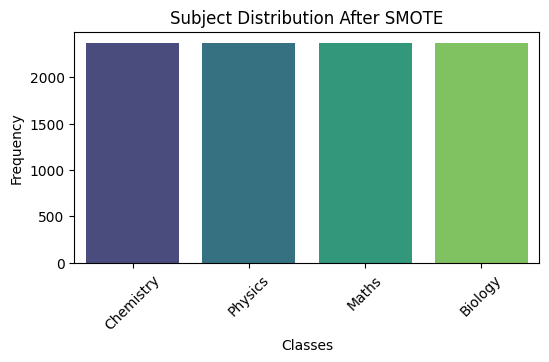

In [51]:
plt.figure(figsize=(6,3))
sns.countplot(x=y_train_resampled, palette='viridis')
plt.title('Subject Distribution After SMOTE')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [52]:
mnb_smote = MultinomialNB()
mnb_smote.fit(X_train, y_train)

train_score_smote = mnb_smote.score(X_train, y_train)
test_score_smote = mnb_smote.score(X_test, y_test)
print("\nTraining Accuracy score:", train_score_smote)
print("Testing Accuracy score:", test_score_smote)


Training Accuracy score: 0.889795918367347
Testing Accuracy score: 0.8504476040021064


In [53]:
y_pred_test_mnb_smote = mnb_smote.predict(X_test)

In [54]:
print("\nClassification Report for Testing Set:")
print(classification_report(y_test, y_pred_test_mnb_smote))


Classification Report for Testing Set:
              precision    recall  f1-score   support

     Biology       0.95      0.52      0.67       213
   Chemistry       0.80      0.91      0.85       578
       Maths       0.93      0.86      0.89       514
     Physics       0.82      0.91      0.86       594

    accuracy                           0.85      1899
   macro avg       0.88      0.80      0.82      1899
weighted avg       0.86      0.85      0.85      1899



As per checking the f1-score, the result are mainly above 0.85 except for biology - so most likely the SMOTE did not help in this case.

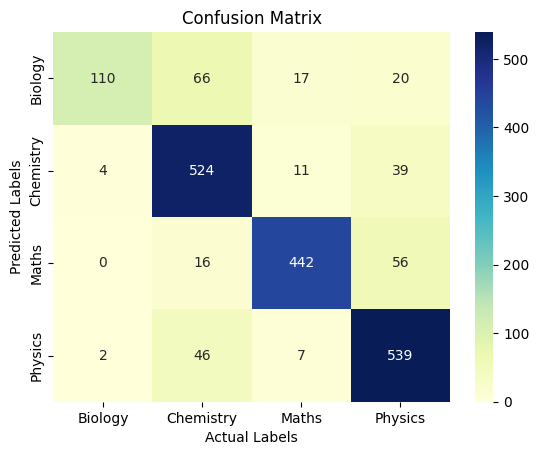

In [56]:
cm = confusion_matrix(y_test, y_pred_test_mnb_smote)

cm_matrix = pd.DataFrame(data=cm, columns=['Biology','Chemistry','Maths', 'Physics'],
                         index=['Biology','Chemistry','Maths', 'Physics'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.show()

110 Biology instances were correctly classified as Biology.

66 Biology instances were incorrectly classified as Chemistry.

17 Biology instances were incorrectly classified as Math.

20 Biology instances were incorrectly classified as Physics.

RANDOMFOREST

In [58]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [70]:
param_grid = {
    'n_estimators': [20, 50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

In [71]:
rf = RandomForestClassifier(random_state=42)

In [72]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=skf, n_jobs=-1, verbose=2, scoring='f1')

In [73]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 50, 100]},
             scoring='f1', verbose=2)

In [74]:
best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 20}


In [76]:
best_rf

RandomForestClassifier(max_depth=10, n_estimators=20, random_state=42)

In [75]:
best_rf = RandomForestClassifier(random_state=42, n_estimators=20, max_depth=10, min_samples_split=2)

In [81]:
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Biology       1.00      0.00      0.01       213
   Chemistry       0.53      0.91      0.67       578
       Maths       0.89      0.55      0.68       514
     Physics       0.81      0.79      0.80       594

    accuracy                           0.67      1899
   macro avg       0.81      0.56      0.54      1899
weighted avg       0.77      0.67      0.64      1899



In [80]:
confusion_matrix(y_test, y_pred)

array([[  1, 170,  12,  30],
       [  0, 526,  11,  41],
       [  0, 190, 282,  42],
       [  0, 110,  12, 472]])

Suggestions for further steps:
- Further tuning
- Different model implementation
- Neaural Network
- ROC/AUC to use for evaluation